## Importo librerias y el Df

In [1]:
import pandas as pd


In [2]:
df_churn = pd.read_csv(r'Churn.csv', sep=';', decimal=',')


In [3]:
df_churn.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   State               3099 non-null   object  
 1   Account_Length      3099 non-null   int64   
 2   Area_Code           3099 non-null   int64   
 3   Phone               3099 non-null   object  
 4   Intl_Plan           3099 non-null   object  
 5   Vmail_Plan          3099 non-null   object  
 6   Vmail_Message       3099 non-null   int64   
 7   Day_Mins            3099 non-null   float64 
 8   Day_Calls           3099 non-null   int64   
 9   Day_Charge          3099 non-null   float64 
 10  Eve_Mins            3099 non-null   float64 
 11  Eve_Calls           3099 non-null   int64   
 12  Eve_Charge          3099 non-null   float64 
 13  Night_Mins          3099 non-null   float64 
 14  Night_Calls         3099 non-null   int64   
 15  Night_Charge        3099 non-null   fl

In [25]:
### VER SI QUEREMOS CAMBIAR FORMATOS DE LAS VARAIBLES

In [ ]:
df_churn.shape

(3099, 21)

In [8]:
## Night_Mins Night_Calls  Night_Charge tienen un min > 0 Raro revisar datos  
df_churn.describe()


,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3099.00000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000,3099.000000
mean,101.18393,437.191029,8.074540,179.596999,100.366570,30.532043,201.024266,100.013875,17.087270,200.682995,99.971281,9.030810,10.236528,4.462407,2.764372,1.555340
std,39.85297,42.365585,13.668535,54.632572,20.081223,9.287510,50.900248,19.860313,4.326493,50.613708,19.508605,2.277665,2.782396,2.441330,0.751239,1.312804
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.00000,411.500000,0.000000,143.900000,87.000000,24.460000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.00000,415.000000,0.000000,179.300000,101.000000,30.480000,201.300000,100.000000,17.110000,201.300000,100.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,510.000000,19.500000,216.000000,114.000000,36.720000,235.800000,113.500000,20.040000,235.150000,113.000000,10.580000,12.100000,6.000000,3.270000,2.000000
max,243.00000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,395.000000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


In [11]:
# No hay nulos
df_churn.isna().sum().sum()

np.int64(0)

In [9]:
df_churn.Churn.value_counts()

Churn
False.    2652
True.      447
Name: count, dtype: int64

In [10]:
df_churn.Churn.value_counts('%')

Churn
False.    0.85576
True.     0.14424
Name: proportion, dtype: float64

In [13]:
# Transformo Churn en numeric
df_churn['Flag_churn'] = df_churn['Churn'].map({'True.': 1, 'False.': 0})


## Univariado

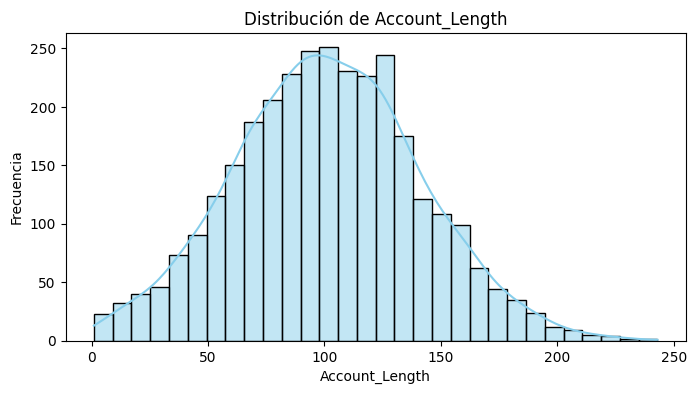

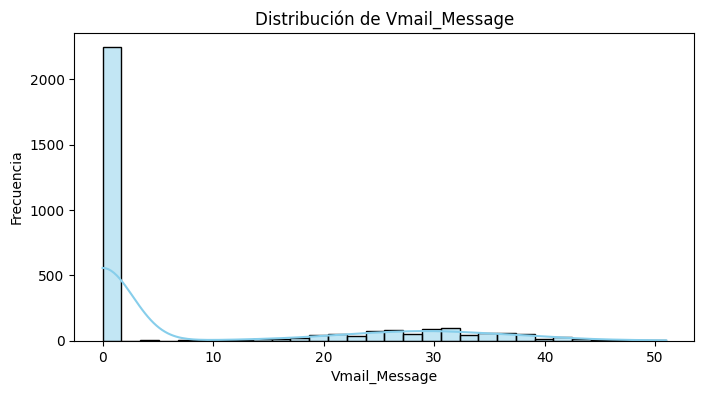

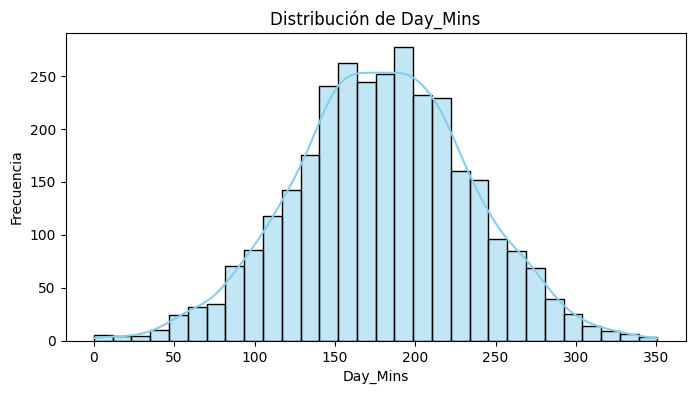

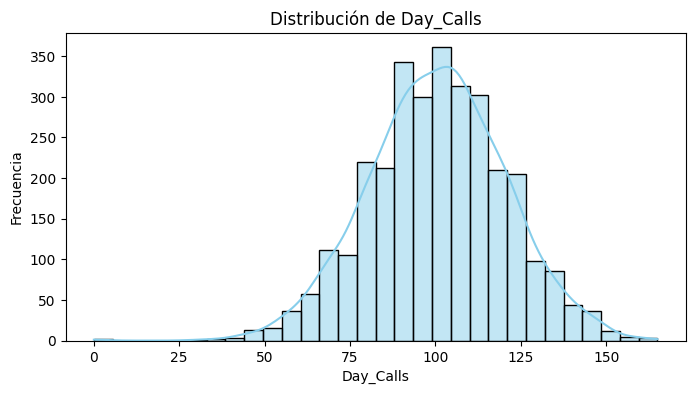

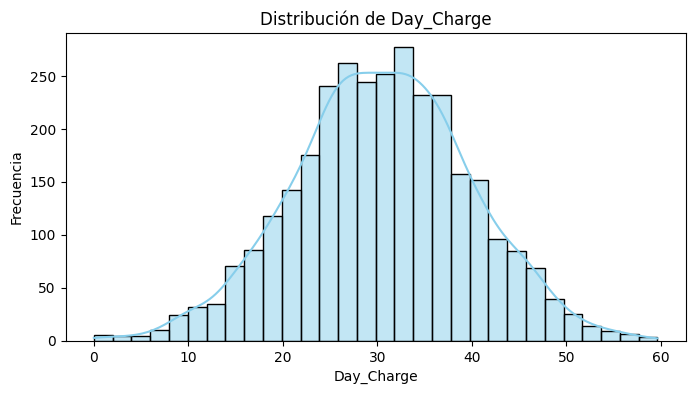

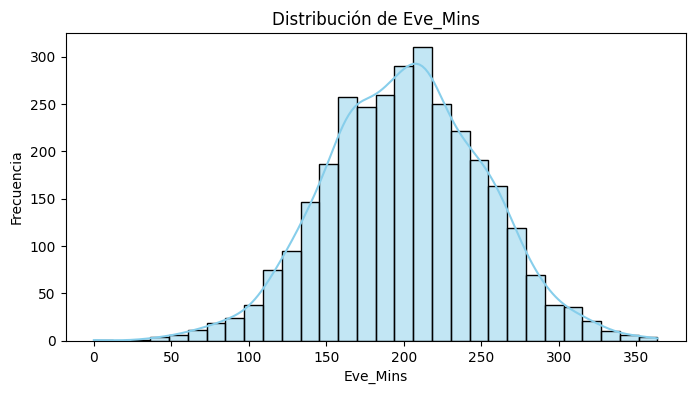

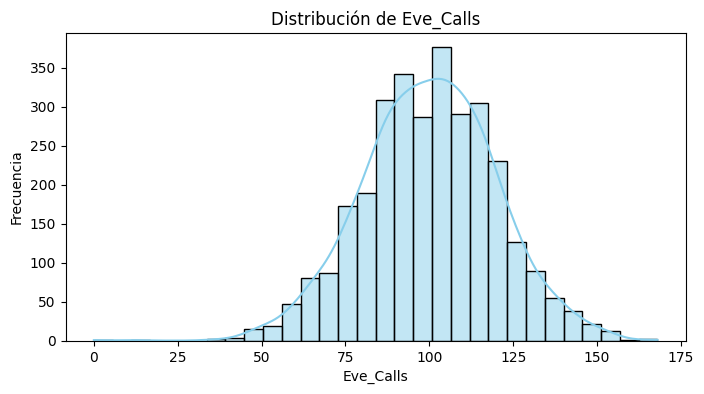

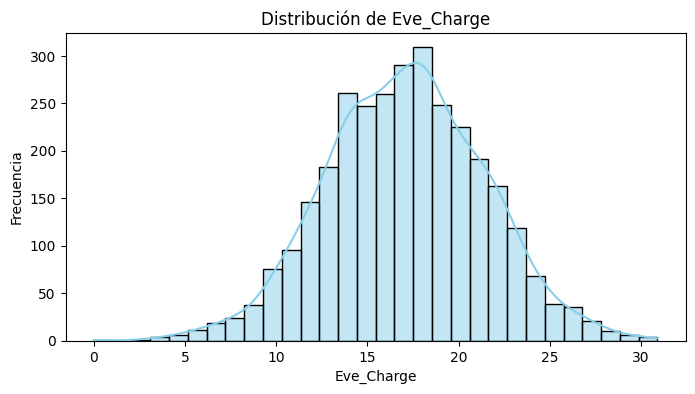

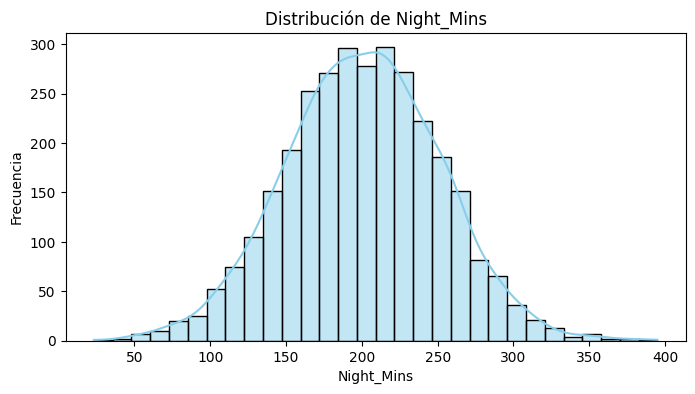

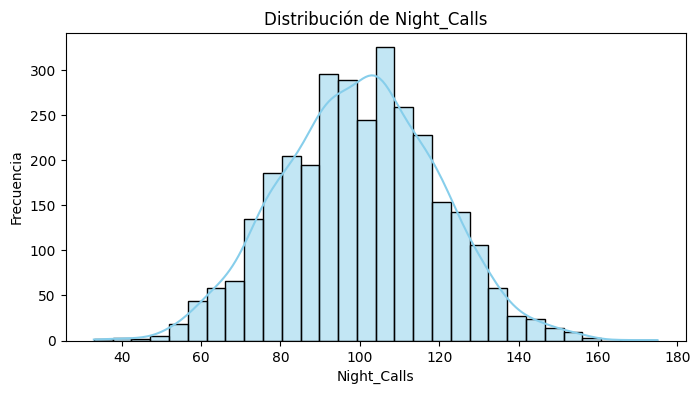

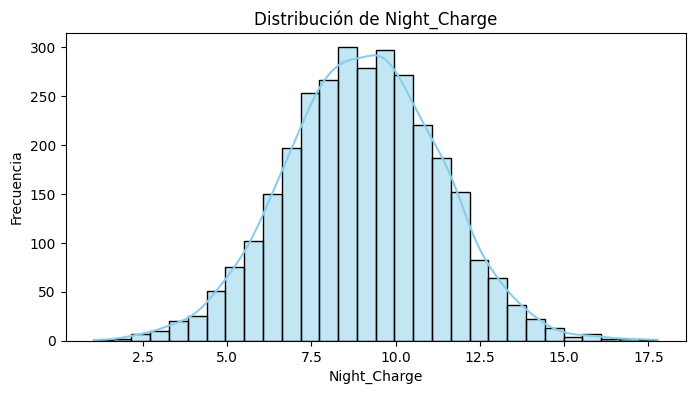

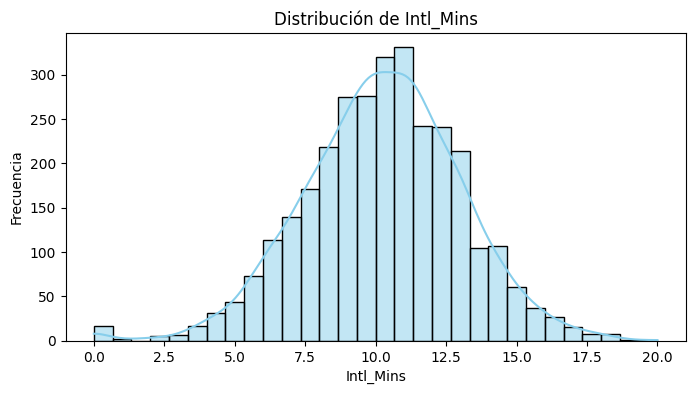

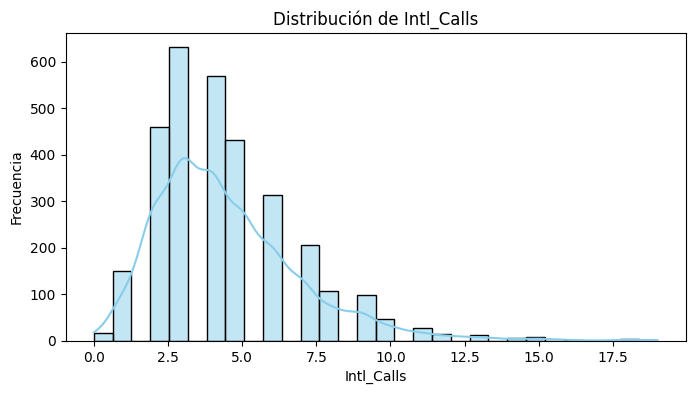

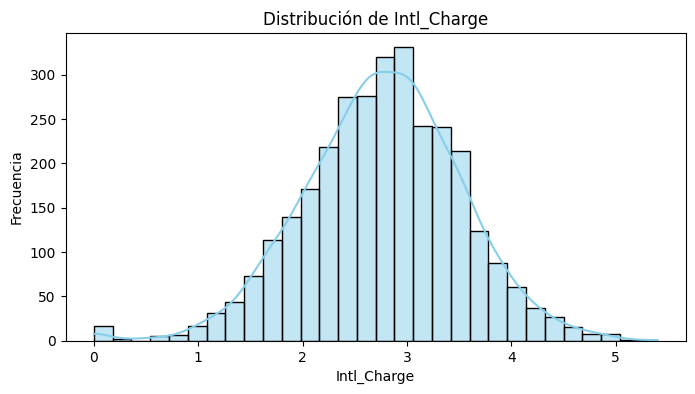

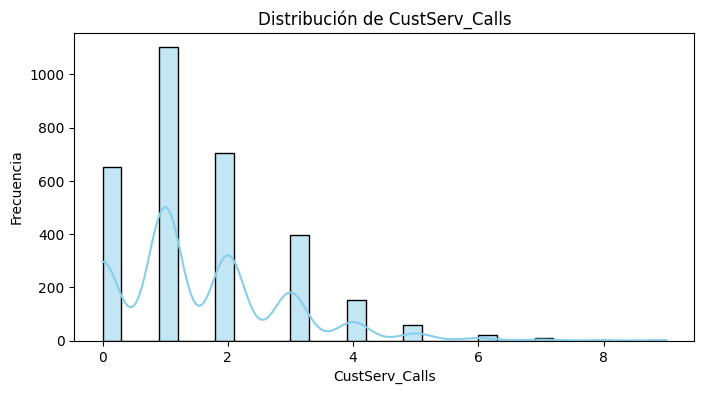

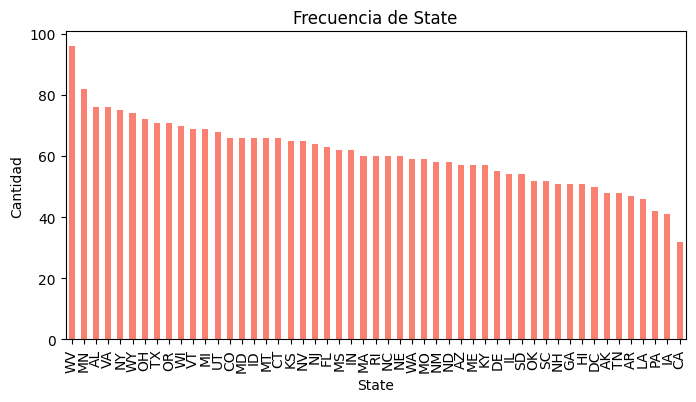

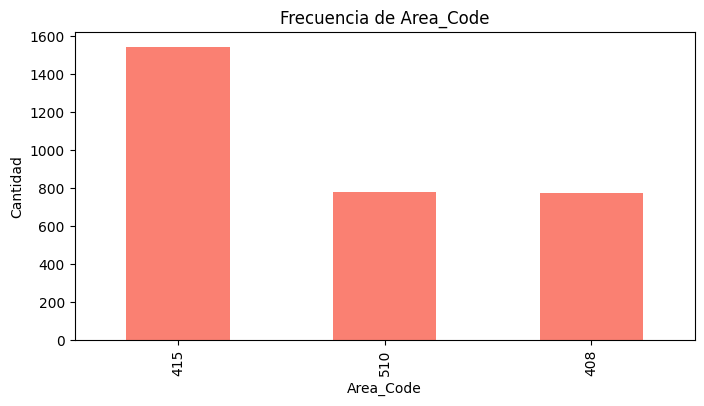

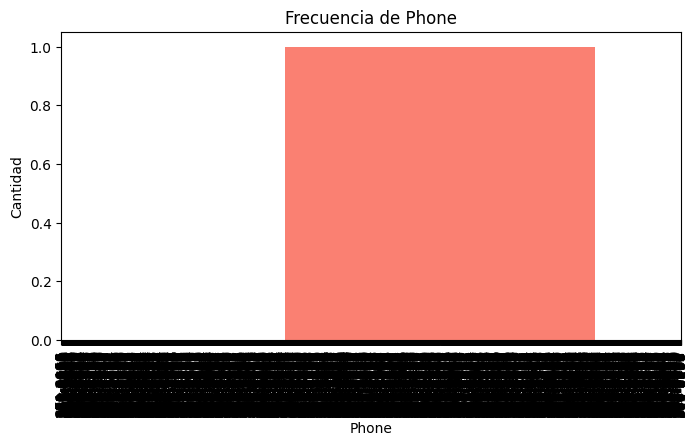

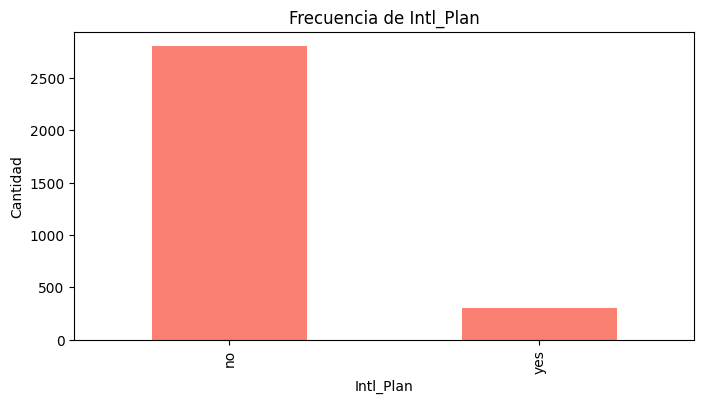

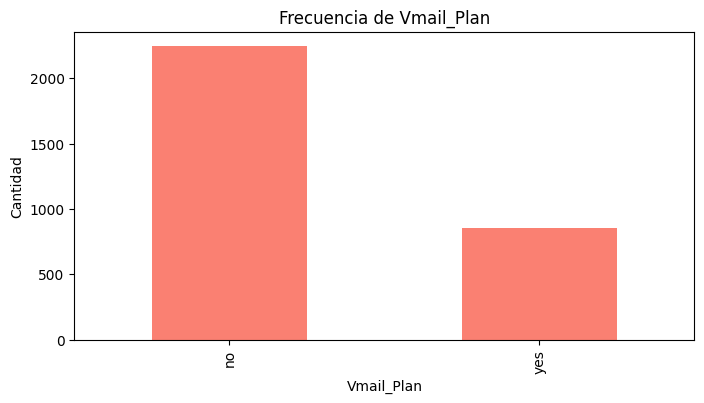

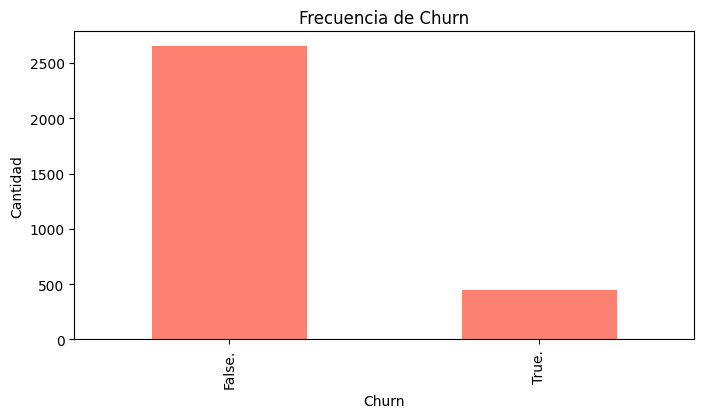

In [14]:
# Análisis univariado de las variables numéricas y categóricas

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
variables_numericas = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
                       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']

for var in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df_churn[var], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

# Variables categóricas
variables_categoricas = ['State', 'Area_Code', 'Phone', 'Intl_Plan', 'Vmail_Plan', 'Churn']

for var in variables_categoricas:
    plt.figure(figsize=(8,4))
    df_churn[var].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Frecuencia de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.show()


## Bi Variado

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


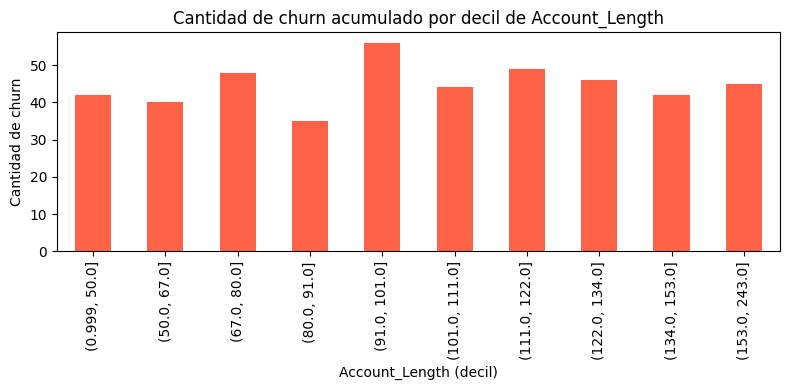

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


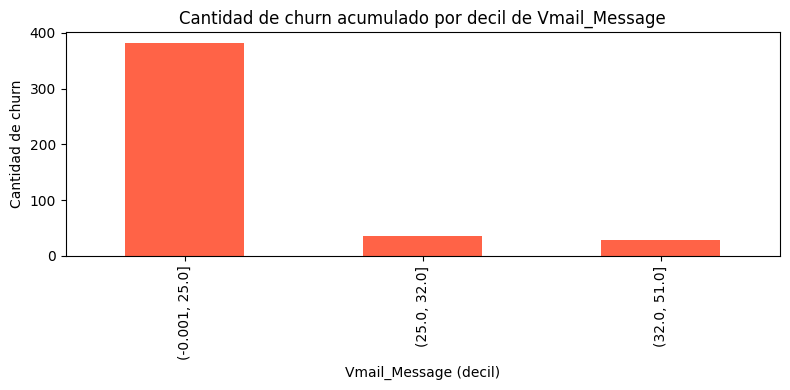

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


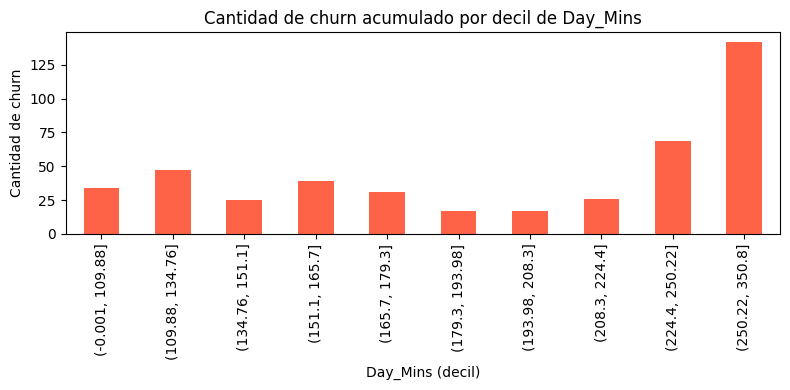

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


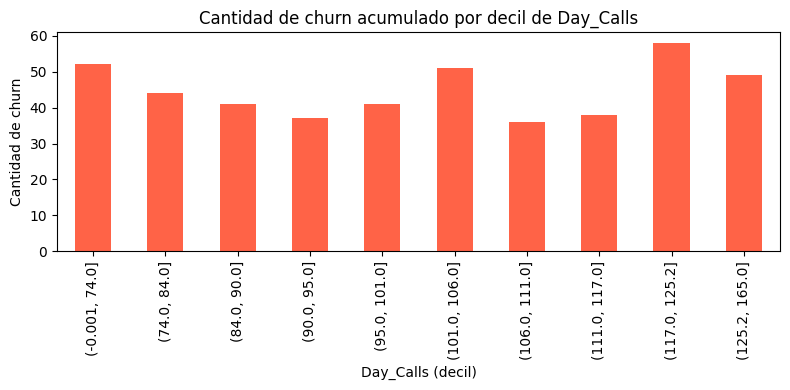

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


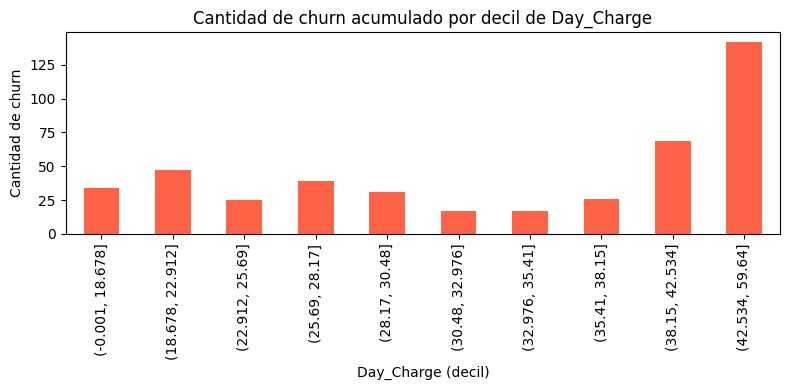

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


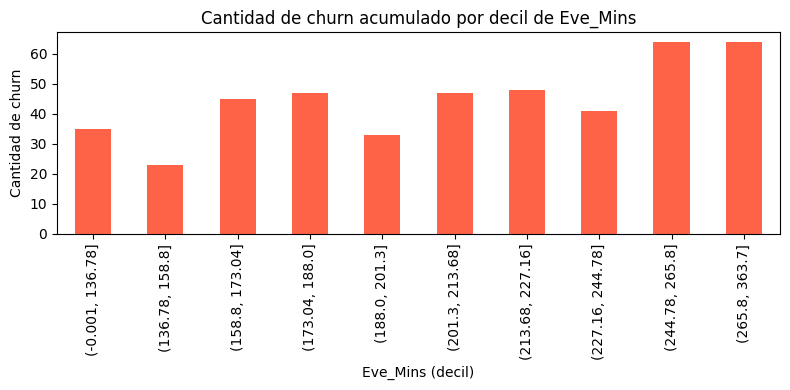

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


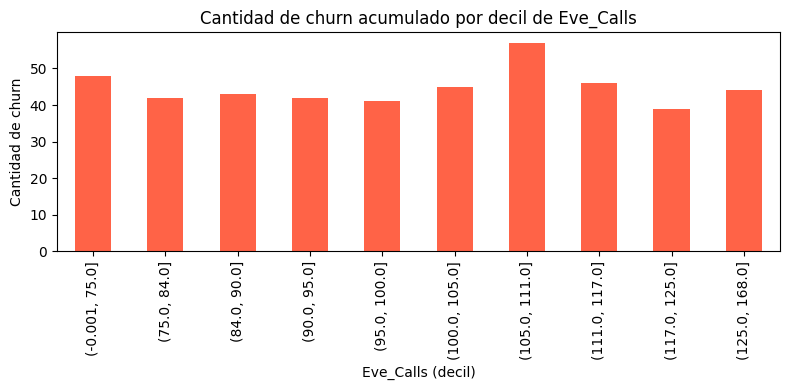

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


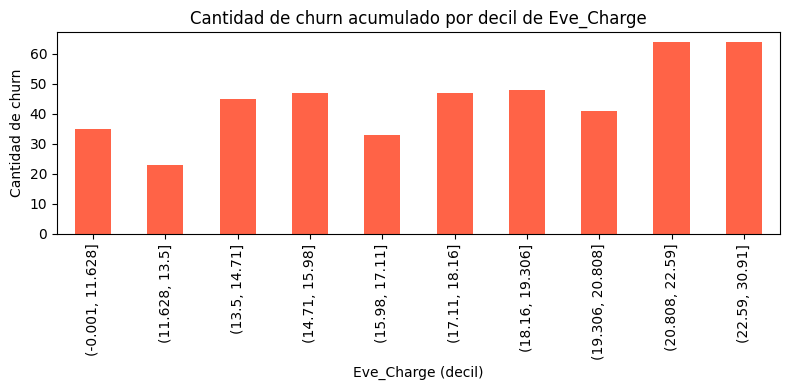

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


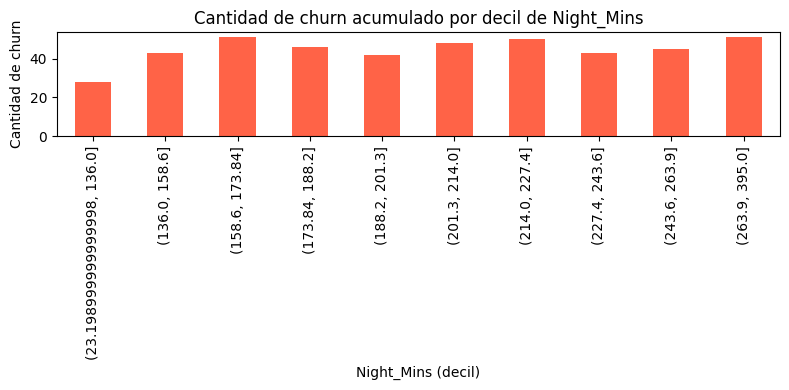

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


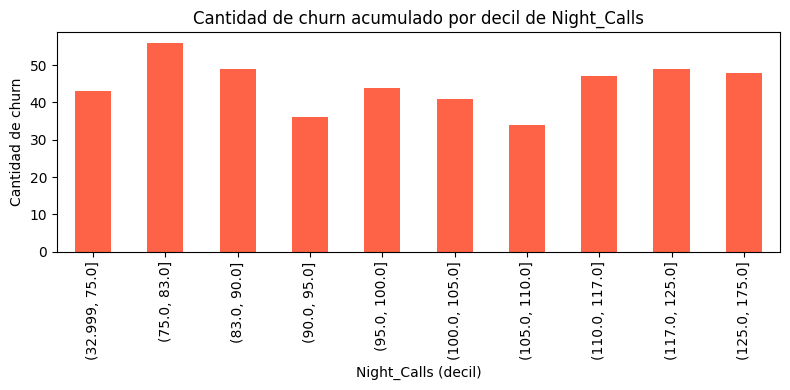

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


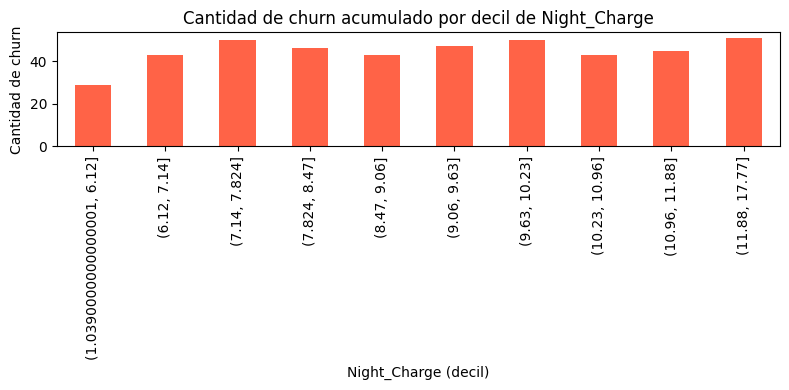

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


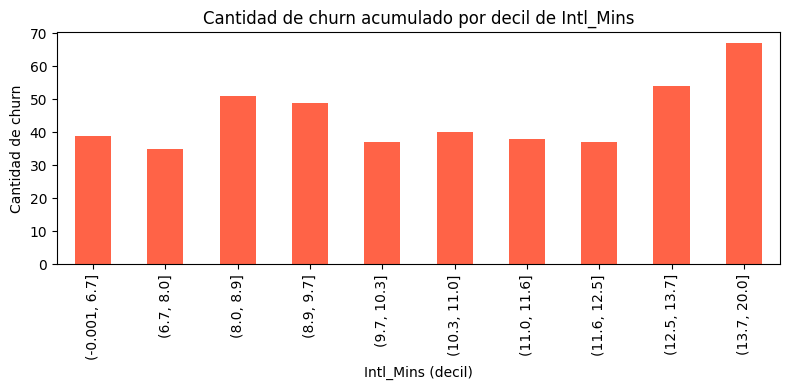

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


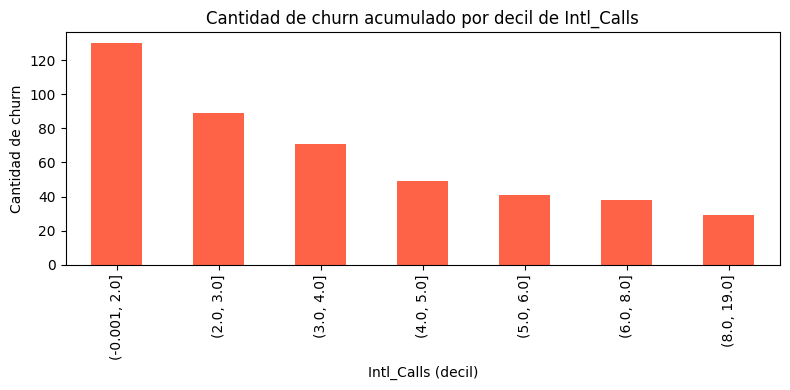

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


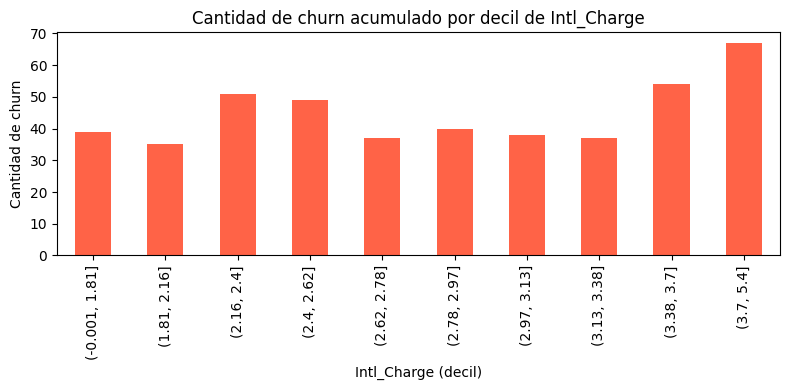

C:\Users\lucki\AppData\Local\Temp\ipykernel_11284\4170622657.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()


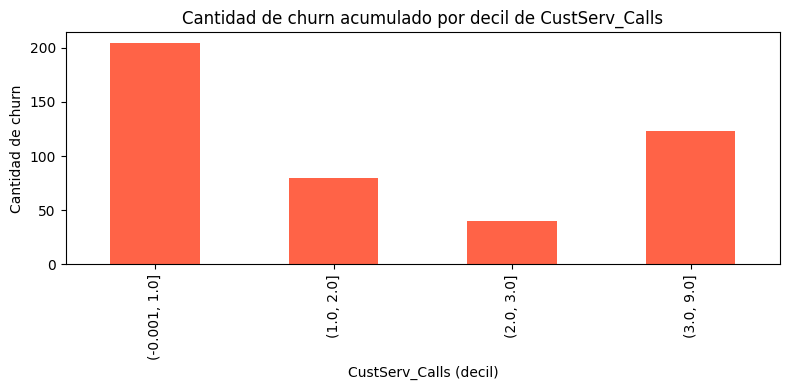

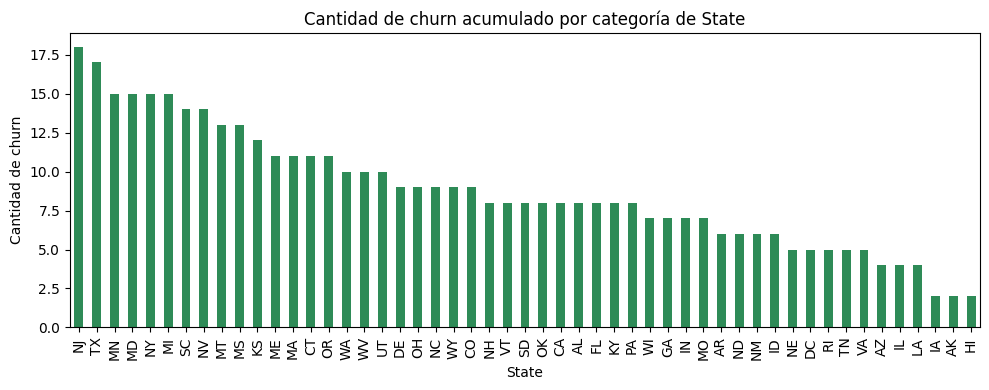

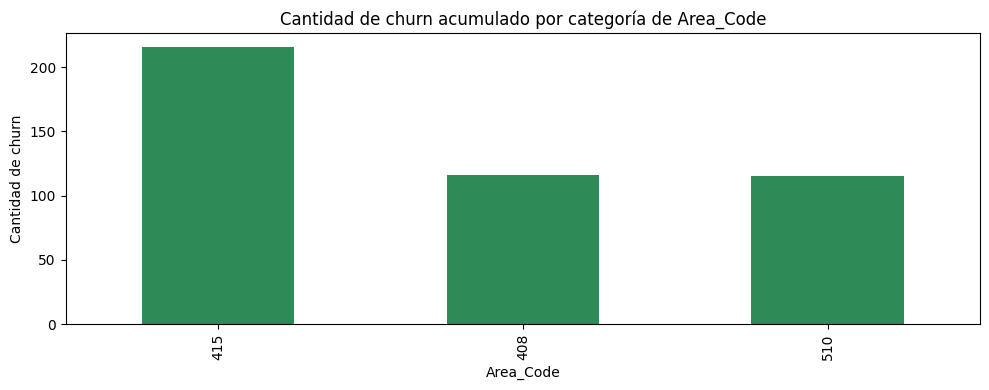

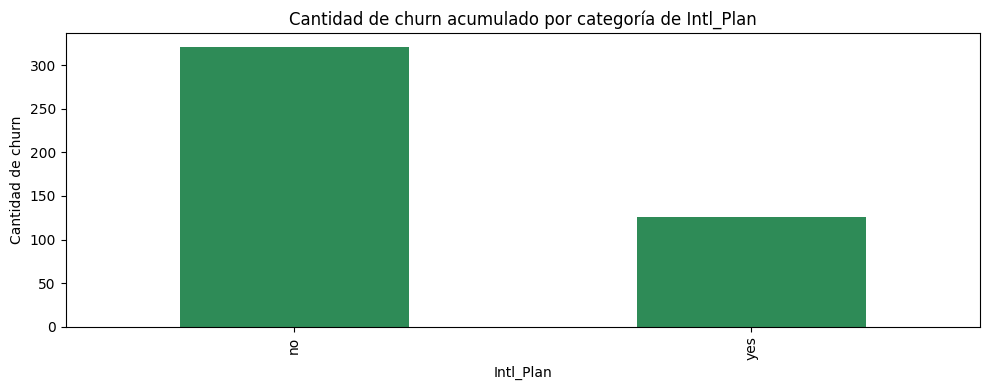

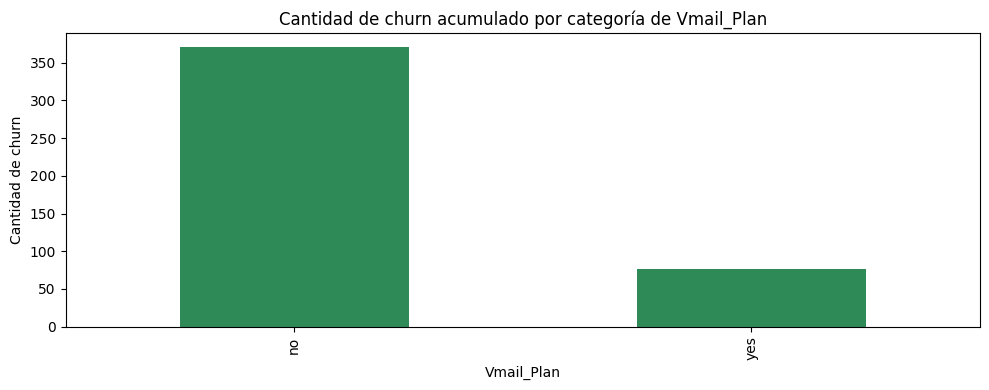

In [16]:
# Análisis bivariado usando 'Flag_churn' como variable dependiente

# Para variables numéricas: mostrar cuántos churn acumula cada valor (o rango) de la variable
import numpy as np

variables_numericas = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
                       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
                       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls']

# Para evitar demasiados valores únicos, agrupamos en bins (deciles)
for var in variables_numericas:
    plt.figure(figsize=(8,4))
    # Creamos deciles para la variable
    try:
        df_churn[f'{var}_bin'] = pd.qcut(df_churn[var], 10, duplicates='drop')
        conteo = df_churn.groupby(f'{var}_bin')['Flag_churn'].sum()
        conteo.plot(kind='bar', color='tomato')
        plt.title(f'Cantidad de churn acumulado por decil de {var}')
        plt.xlabel(f'{var} (decil)')
        plt.ylabel('Cantidad de churn')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"No se pudo agrupar {var}: {e}")

# Para variables categóricas: mostrar cuántos churn acumula cada categoría
variables_categoricas = ['State', 'Area_Code', 'Intl_Plan', 'Vmail_Plan']

for var in variables_categoricas:
    plt.figure(figsize=(10,4))
    conteo = df_churn.groupby(var)['Flag_churn'].sum().sort_values(ascending=False)
    conteo.plot(kind='bar', color='seagreen')
    plt.title(f'Cantidad de churn acumulado por categoría de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de churn')
    plt.tight_layout()
    plt.show()


In [19]:
df_churn.groupby('Flag_churn')['Day_Calls'].describe()

,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,100.261689,19.789370,0.0,87.0,100.0,114.0,163.0
1,447.0,100.988814,21.745622,0.0,87.0,103.0,116.5,165.0


In [20]:
# Podemos hacer esto para varias variables numéricas usando un bucle.
variables = ['Day_Calls', 'Day_Mins', 'Eve_Calls', 'Eve_Mins', 'Night_Calls', 'Night_Mins', 'Intl_Calls', 'Intl_Mins', 'CustServ_Calls']

for var in variables:
    print(f"Descripción de {var} por Churn_bin:")
    display(df_churn.groupby('Flag_churn')[var].describe())
    print("\n" + "-"*60 + "\n")


Descripción de Day_Calls por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,100.261689,19.789370,0.0,87.0,100.0,114.0,163.0
1,447.0,100.988814,21.745622,0.0,87.0,103.0,116.5,165.0



------------------------------------------------------------

Descripción de Day_Mins por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,174.983371,50.395284,0.0,142.875,177.0,209.90,315.6
1,447.0,206.969128,68.986827,0.0,154.000,217.6,265.95,350.8



------------------------------------------------------------

Descripción de Eve_Calls por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,99.894419,19.954744,0.0,87.0,100.0,113.0,164.0
1,447.0,100.722595,19.297157,48.0,87.5,102.0,114.0,168.0



------------------------------------------------------------

Descripción de Eve_Mins por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,199.086652,50.482411,0.0,164.5,199.45,233.525,361.8
1,447.0,212.519911,51.900562,70.9,177.1,211.30,249.750,363.7



------------------------------------------------------------

Descripción de Night_Calls por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,99.917798,19.469289,33.0,87.0,100.0,113.0,175.0
1,447.0,100.288591,19.759301,51.0,85.5,100.0,115.0,158.0



------------------------------------------------------------

Descripción de Night_Mins por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,199.923680,51.164408,23.2,165.875,200.45,234.7,395.0
1,447.0,205.187919,47.016695,72.4,170.800,204.70,239.7,354.9



------------------------------------------------------------

Descripción de Intl_Calls por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,4.515083,2.430505,0.0,3.0,4.0,6.0,19.0
1,447.0,4.149888,2.484462,1.0,2.0,4.0,5.0,15.0



------------------------------------------------------------

Descripción de Intl_Mins por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,10.160973,2.769061,0.0,8.4,10.2,12.0,18.9
1,447.0,10.684787,2.822013,2.0,8.8,10.6,12.8,20.0



------------------------------------------------------------

Descripción de CustServ_Calls por Churn_bin:


,count,mean,std,min,25%,50%,75%,max
Flag_churn,,,,,,,,
0,2652.0,1.448341,1.165958,0.0,1.0,1.0,2.0,8.0
1,447.0,2.190157,1.849031,0.0,1.0,2.0,4.0,9.0



------------------------------------------------------------



In [21]:
df_churn.groupby(['Vmail_Plan', 'Intl_Plan',]).agg({'Flag_churn': ['mean','count']}).reset_index()

Vmail_Plan Intl_Plan Flag_churn      
                             mean count
0         no        no   0.136744  2033
1         no       yes   0.440758   211
2        yes        no   0.056063   767
3        yes       yes   0.375000    88